___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителя

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [1]:
import pandas as pd

df = pd.read_csv('groceries.csv')

In [2]:
df.head(8)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [4]:
from apyori import apriori

df1 = df.drop(columns=['Item(s)'])

In [5]:
#перетворюємо у потрібний формат дані та опрацьовуємо за допомогою apriori
trans_list = []
for i in range(9835):
    l = []
    for j in range(32):
        prod = str(df1.values[i,j])
        if prod!='nan':
            l.append(prod)
    trans_list.append(l)
trans_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [6]:
result = list(apriori(trans_list, max_length = 1, min_support=0.003, min_confidence = 0.1, min_lift = 1))
df_results = pd.DataFrame(result)
print('Топ-3 продуктів:')
df_results.sort_values('support', ascending=False).head(3)

Топ-3 продуктів:


,items,support,ordered_statistics
6,(whole milk),0.255516,"[((), (whole milk), 0.25551601423487547, 1.0)]"
1,(other vegetables),0.193493,"[((), (other vegetables), 0.1934926283680732, ..."
2,(rolls/buns),0.183935,"[((), (rolls/buns), 0.18393492628368074, 1.0)]"


In [7]:
result = list(apriori(trans_list, max_length = 2, min_support=0.03, min_confidence = 0.1, min_lift = 1))
df_results = pd.DataFrame(result)
print('Топ 2ві пари продуктів:')
df_results.sort_values('support', ascending=False, inplace=True)
top2 = [df_results.values[8], df_results.values[9]]
top2

Топ 2ві пари продуктів:


[array([frozenset({'whole milk', 'other vegetables'}), 0.07483477376715811,
        list([OrderedStatistic(items_base=frozenset({'other vegetables'}), items_add=frozenset({'whole milk'}), confidence=0.38675775091960063, lift=1.5136340948246207), OrderedStatistic(items_base=frozenset({'whole milk'}), items_add=frozenset({'other vegetables'}), confidence=0.2928770393951452, lift=1.5136340948246205)])],
       dtype=object),
 array([frozenset({'rolls/buns', 'whole milk'}), 0.05663446873411286,
        list([OrderedStatistic(items_base=frozenset({'rolls/buns'}), items_add=frozenset({'whole milk'}), confidence=0.30790491984521834, lift=1.2050317893663836), OrderedStatistic(items_base=frozenset({'whole milk'}), items_add=frozenset({'rolls/buns'}), confidence=0.22164743334659767, lift=1.2050317893663836)])],
       dtype=object)]

#### Найкраще продаються: цільне молоко, овочі і булочки, та їх пари:  цільне молоко-овочі та цільне молоко-булочки.
На мою думку, можливий варіант як спільного розміщення даних пар, так і рознесення їх по торговій залі, для розміщення інших товарних груп між ними. Який з варіантів доцільніший для збільшення прибутку від продажів(цих товарів, або доданих до них), подрібно досліджувати.


### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [8]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df = df.set_index('CustomerID')
df['Gender'] = df['Gender'].map(lambda x: 0 if x=='Male' else 1 )
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


In [9]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2)
y_pred = cluster.fit_predict(df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Text(0, 0.5, 'Spending Score (1-100)')

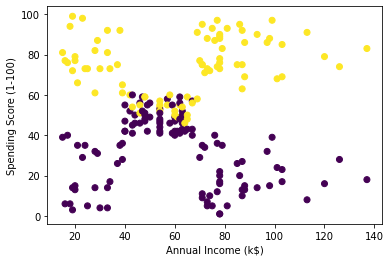

In [10]:
import matplotlib as plt
import matplotlib.pyplot

fig, ax = plt.pyplot.subplots()
ax.scatter(df['Annual Income (k$)'], df[ 'Spending Score (1-100)'], c= y_pred)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

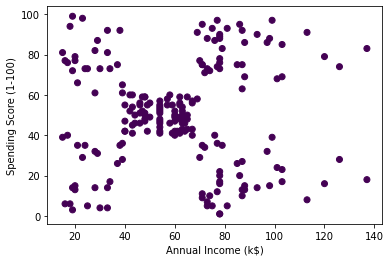

In [11]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=2)
y_pred = cluster.fit_predict(df)
fig, ax = plt.pyplot.subplots()
ax.scatter(df['Annual Income (k$)'], df[ 'Spending Score (1-100)'], c= y_pred)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

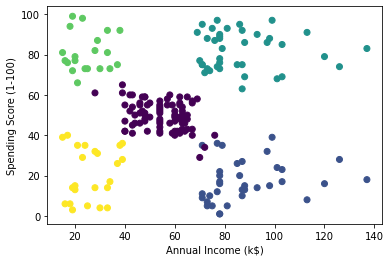

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5)
y_pred = cluster.fit_predict(df)
fig, ax = plt.pyplot.subplots()
ax.scatter(df['Annual Income (k$)'], df[ 'Spending Score (1-100)'], c= y_pred)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

### Отже
Виділяється 5 цільових груп по відношенню доходів до витрат. 
Відповідно до цих данних, доцільно проводити акції
для двох груп з низьким рівнем витрат (ліва нижня і права нижня, на зображенні),
але з розрахунком на те, що одна має нижчий дохід, порівняно з іншою 
(можливо, проводити акції на різні сегменти цін: товари бюджетних категорій і преміум,
згідно з зацікавленостями кліентів. Що потрібно досліджувати додатково)